<a href="https://colab.research.google.com/github/navy510616/DX-Motor/blob/master/DX_Motor%2018%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
#다운 받을 폴더 생성
import os.path

nowfolder = os.getcwd()                                         #현재 폴더 위치 확인
newfolder = 'DXmotor - OK'                                           #신규 폴더 생성
upfolder = os.path.abspath(os.path.join(nowfolder, os.pardir))  #현재 폴더에서 최상위 폴더로 이동
os.chdir(upfolder)                                              #최상위 폴더를 현재 위치로 변경

if not os.path.exists(newfolder):                               #현재 폴더에 신규 폴더 이름이 없는지 확인
    os.makedirs(newfolder)                                      #신규 폴더 생성
    
os.chdir('/'+ newfolder)                                        #신규 폴더로 현재 위치로 변경
folder = os.getcwd()                                            #신규 폴더를 변수 지정

In [ ]:
#깃허브에서 파일 다운 받아 압축 풀기 
#from urllib.parse import urlparse
import urllib.request
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK1.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK1.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK2.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK2.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK3.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK3.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK4.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK4.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK5.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK5.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK6.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK6.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/OK7.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'OK7.zip')                                #down.zip이라는 이름으로 파일 다운

In [ ]:
#다운받은 파일 압축 풀기
!unzip OK1.zip                                                 #zip 파일 압축 풀기
!unzip OK2.zip
!unzip OK3.zip
!unzip OK4.zip
!unzip OK5.zip
!unzip OK6.zip
!unzip OK7.zip

In [ ]:
pip install nptdms   # 한번만 설치 / colab 재접속시 설치 필요

In [12]:
from nptdms import TdmsFile as td
from nptdms import tdms

folder_path = folder                                                     # 폴더 주소 받기
file_list = os.listdir(folder_path)                                      # 폴더 내에 파일 전체 리스트 받기
file_list_tdms = [file for file in file_list if file.endswith('.tdms')]  # 폴더 내에 Tdms 파일만 리스트 만들기
df = pd.DataFrame()                                                      # 빈 DataFrame 만들기 

for i in range(len(file_list_tdms)):                                     # 폴더 내에 파일 for 문
  file_path = folder_path + '/' + file_list_tdms[i]                      # 폴더 내 파일 주소 
  tdms_file = td.read(file_path)                                         # tdms 파일을 변환


  for group in tdms_file.groups():                                       # tdms 파일내에 data 값 가지고 오기
#    group_name = group.name                                             # (정보 가져오기)
    for channel in group.channels():
#        channel_name = channel.name                                     # (정보 가져오기)
#        properties = channel.properties                                 # (정보 가져오기)
        data = pd.DataFrame(channel[0:6500])                              # 합/불 진동 데이터로 사용하는 주파수가 0 ~ 6500Hz임 (이후 데이터 삭제)
        data.columns = [ i+1 ]                                           # 컬럼명 변경
  
  df = pd.concat([df, data], axis=1)                                     # 각각의 데이터를 열 추가  
  i = i + 1

dfOK = df.copy()                                                           #사본 저장

In [14]:
df1=dfOK.transpose() #행,열 변환
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6460,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499
1,0.077197,0.069886,0.051797,0.028239,0.004567,-0.009849,-0.039362,-0.040127,-0.050767,-0.059788,-0.056494,-0.043674,-0.039826,-0.037808,-0.040663,-0.046666,-0.037453,-0.033165,-0.025548,-0.036243,-0.028980,-0.027505,-0.010042,0.026282,0.062461,0.088494,0.102952,0.096015,0.097490,0.090457,0.077974,0.076426,0.063196,0.058150,0.036941,0.003760,-0.014311,-0.032521,-0.053146,-0.067966,...,-0.100658,-0.106608,-0.095762,-0.073987,-0.052742,-0.038603,-0.027890,-0.028209,-0.020441,0.002634,0.029137,0.052056,0.066099,0.082972,0.088723,0.098418,0.089228,0.100200,0.079003,0.055073,0.018111,-0.000045,-0.023801,-0.025855,-0.047461,-0.061859,-0.073837,-0.071850,-0.070844,-0.057373,-0.050581,-0.033123,-0.034454,-0.032461,-0.022194,0.002881,0.027800,0.056476,0.059450,0.055825
2,0.099146,0.079202,0.043926,-0.001491,-0.032888,-0.060095,-0.066936,-0.071549,-0.079070,-0.091023,-0.095931,-0.105024,-0.094402,-0.095564,-0.078233,-0.066526,-0.056193,-0.050081,-0.026656,-0.013191,0.003893,0.002917,0.003038,0.002767,0.009770,0.018243,0.033261,0.054037,0.060733,0.048768,0.040747,0.038422,0.040235,0.054808,0.044450,0.023386,-0.013366,-0.053736,-0.082370,-0.086579,...,0.078871,0.060715,0.051863,0.054067,0.034062,0.003646,-0.027390,-0.057373,-0.063702,-0.058216,-0.046986,-0.035604,-0.045293,-0.054079,-0.039681,-0.028601,0.001906,0.017243,0.027751,0.022085,0.012908,0.005772,0.025475,0.043890,0.059721,0.060215,0.054151,0.050406,0.053940,0.059776,0.060956,0.060950,0.055729,0.034303,0.011306,0.008144,-0.003658,-0.012715,-0.033177,-0.062498
3,-0.013974,0.009325,0.018285,0.026619,0.014238,0.015991,0.020236,0.038350,0.041951,0.035387,0.011739,-0.002436,-0.015172,-0.019406,-0.021248,-0.041271,-0.051592,-0.066267,-0.066249,-0.047979,-0.016684,-0.008837,-0.003628,-0.016069,-0.019797,-0.006946,0.014094,0.040042,0.053669,0.048406,0.026770,0.023608,0.028757,0.055133,0.074403,0.074577,0.055458,0.033496,0.012239,0.007928,...,0.036742,0.014540,0.005742,-0.000118,0.006844,0.012342,-0.000130,-0.014510,-0.034514,-0.047142,-0.044408,-0.043216,-0.032714,-0.025096,-0.013402,0.005260,0.011161,0.014166,0.004652,0.006482,0.010932,0.019164,0.032473,0.035887,0.035375,0.025403,-0.002761,-0.013570,-0.013342,-0.007922,0.008114,0.008855,0.007356,0.003116,-0.013739,-0.024458,-0.030684,-0.041614,-0.042680,-0.052544
4,0.012920,0.011167,0.018574,0.030823,0.030750,0.033430,0.021754,0.029492,0.022964,0.034165,0.018725,0.015937,-0.000792,0.003592,0.002990,0.019923,0.030052,0.035309,0.036302,0.029221,0.021748,0.014467,0.012378,0.004772,-0.004086,-0.017750,-0.020526,-0.036682,-0.039783,-0.056596,-0.054435,-0.073530,-0.067640,-0.074313,-0.058379,-0.061643,-0.055759,-0.065406,-0.061053,-0.046335,...,-0.004538,-0.002514,0.004832,0.007542,0.001671,-0.005911,-0.009301,0.018375,0.048689,0.080665,0.092793,0.085429,0.068062,0.064430,0.056084,0.063714,0.056259,0.036080,0.013775,-0.002948,-0.006477,-0.000051,0.005892,0.010890,0.008602,-0.000389,-0.001063,0.003568,0.024030,0.043878,0.054121,0.048443,0.037127,0.022500,0.008427,-0.002695,-0.011210,-0.013028,-0.008994,-0.012324
5,-0.008518,0.019544,0.030323,0.030961,0.022711,0.020278,0.021254,0.037278,0.048358,0.062865,0.060661,0.044805,0.013197,-0.004616,-0.011860,-0.005923,-0.005242,-0.012306,-0.024885,-0.037260,-0.053513,-0.055543,-0.060029,-0.059391,-0.062136,-0.065262,-0.078642,-0.070392,-0.062697,-0.045823,-0.036104,-0.012751,0.003797,0.029877,0.055807,0.069344,0.086025,0.096611,0.089999,0.097111,...,0.018147,0.023705,0.021525,0.014214,0.016376,0.013907,0.010120,0.023584,0.028902,0.035261,0.035887,0.020507,0.012107,0.011089,0.009764,0.012348,0.008602,-0.014986,-0.031196,-0.045113,-0.052429,-0.033677,-0.013245,-0.010806,0.002062,-0.012161,-0.018

In [15]:
df1['6500'] = 0
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499,6500
1,0.077197,0.069886,0.051797,0.028239,0.004567,-0.009849,-0.039362,-0.040127,-0.050767,-0.059788,-0.056494,-0.043674,-0.039826,-0.037808,-0.040663,-0.046666,-0.037453,-0.033165,-0.025548,-0.036243,-0.028980,-0.027505,-0.010042,0.026282,0.062461,0.088494,0.102952,0.096015,0.097490,0.090457,0.077974,0.076426,0.063196,0.058150,0.036941,0.003760,-0.014311,-0.032521,-0.053146,-0.067966,...,-0.106608,-0.095762,-0.073987,-0.052742,-0.038603,-0.027890,-0.028209,-0.020441,0.002634,0.029137,0.052056,0.066099,0.082972,0.088723,0.098418,0.089228,0.100200,0.079003,0.055073,0.018111,-0.000045,-0.023801,-0.025855,-0.047461,-0.061859,-0.073837,-0.071850,-0.070844,-0.057373,-0.050581,-0.033123,-0.034454,-0.032461,-0.022194,0.002881,0.027800,0.056476,0.059450,0.055825,0
2,0.099146,0.079202,0.043926,-0.001491,-0.032888,-0.060095,-0.066936,-0.071549,-0.079070,-0.091023,-0.095931,-0.105024,-0.094402,-0.095564,-0.078233,-0.066526,-0.056193,-0.050081,-0.026656,-0.013191,0.003893,0.002917,0.003038,0.002767,0.009770,0.018243,0.033261,0.054037,0.060733,0.048768,0.040747,0.038422,0.040235,0.054808,0.044450,0.023386,-0.013366,-0.053736,-0.082370,-0.086579,...,0.060715,0.051863,0.054067,0.034062,0.003646,-0.027390,-0.057373,-0.063702,-0.058216,-0.046986,-0.035604,-0.045293,-0.054079,-0.039681,-0.028601,0.001906,0.017243,0.027751,0.022085,0.012908,0.005772,0.025475,0.043890,0.059721,0.060215,0.054151,0.050406,0.053940,0.059776,0.060956,0.060950,0.055729,0.034303,0.011306,0.008144,-0.003658,-0.012715,-0.033177,-0.062498,0
3,-0.013974,0.009325,0.018285,0.026619,0.014238,0.015991,0.020236,0.038350,0.041951,0.035387,0.011739,-0.002436,-0.015172,-0.019406,-0.021248,-0.041271,-0.051592,-0.066267,-0.066249,-0.047979,-0.016684,-0.008837,-0.003628,-0.016069,-0.019797,-0.006946,0.014094,0.040042,0.053669,0.048406,0.026770,0.023608,0.028757,0.055133,0.074403,0.074577,0.055458,0.033496,0.012239,0.007928,...,0.014540,0.005742,-0.000118,0.006844,0.012342,-0.000130,-0.014510,-0.034514,-0.047142,-0.044408,-0.043216,-0.032714,-0.025096,-0.013402,0.005260,0.011161,0.014166,0.004652,0.006482,0.010932,0.019164,0.032473,0.035887,0.035375,0.025403,-0.002761,-0.013570,-0.013342,-0.007922,0.008114,0.008855,0.007356,0.003116,-0.013739,-0.024458,-0.030684,-0.041614,-0.042680,-0.052544,0
4,0.012920,0.011167,0.018574,0.030823,0.030750,0.033430,0.021754,0.029492,0.022964,0.034165,0.018725,0.015937,-0.000792,0.003592,0.002990,0.019923,0.030052,0.035309,0.036302,0.029221,0.021748,0.014467,0.012378,0.004772,-0.004086,-0.017750,-0.020526,-0.036682,-0.039783,-0.056596,-0.054435,-0.073530,-0.067640,-0.074313,-0.058379,-0.061643,-0.055759,-0.065406,-0.061053,-0.046335,...,-0.002514,0.004832,0.007542,0.001671,-0.005911,-0.009301,0.018375,0.048689,0.080665,0.092793,0.085429,0.068062,0.064430,0.056084,0.063714,0.056259,0.036080,0.013775,-0.002948,-0.006477,-0.000051,0.005892,0.010890,0.008602,-0.000389,-0.001063,0.003568,0.024030,0.043878,0.054121,0.048443,0.037127,0.022500,0.008427,-0.002695,-0.011210,-0.013028,-0.008994,-0.012324,0
5,-0.008518,0.019544,0.030323,0.030961,0.022711,0.020278,0.021254,0.037278,0.048358,0.062865,0.060661,0.044805,0.013197,-0.004616,-0.011860,-0.005923,-0.005242,-0.012306,-0.024885,-0.037260,-0.053513,-0.055543,-0.060029,-0.059391,-0.062136,-0.065262,-0.078642,-0.070392,-0.062697,-0.045823,-0.036104,-0.012751,0.003797,0.029877,0.055807,0.069344,0.086025,0.096611,0.089999,0.097111,...,0.023705,0.021525,0.014214,0.016376,0.013907,0.010120,0.023584,0.028902,0.035261,0.035887,0.020507,0.012107,0.011089,0.009764,0.012348,0.008602,-0.014986,-0.031196,-0.045113,-0.052429,-0.033677,-0.013245,-0.010806,0.002062,-0.012161,-0.018484,-0.007573,0.010065,0.024090,0.03972

In [16]:
#다운 받을 폴더 생성
import os.path

nowfolder = os.getcwd()                                         #현재 폴더 위치 확인
newfolder = 'DXmotor - NG'                                           #신규 폴더 생성
upfolder = os.path.abspath(os.path.join(nowfolder, os.pardir))  #현재 폴더에서 최상위 폴더로 이동
os.chdir(upfolder)                                              #최상위 폴더를 현재 위치로 변경

if not os.path.exists(newfolder):                               #현재 폴더에 신규 폴더 이름이 없는지 확인
    os.makedirs(newfolder)                                      #신규 폴더 생성
    
os.chdir('/'+ newfolder)                                        #신규 폴더로 현재 위치로 변경
folder = os.getcwd()                                            #신규 폴더를 변수 지정

In [17]:
#깃허브에서 파일 다운 받아 압축 풀기 
#from urllib.parse import urlparse
import urllib.request
urls = 'https://github.com/navy510616/DX-Motor/raw/main/NG1.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'NG1.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/NG2.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'NG2.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/NG3.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'NG3.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/NG6.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'NG4.zip')                                #down.zip이라는 이름으로 파일 다운
urls = 'https://github.com/navy510616/DX-Motor/raw/main/NG7.zip'             #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'NG5.zip')                                #down.zip이라는 이름으로 파일 다운

('NG5.zip', <http.client.HTTPMessage at 0x7fb780c16690>)

In [18]:
#다운받은 파일 압축 풀기
!unzip NG1.zip                                                 #zip 파일 압축 풀기
!unzip NG2.zip
!unzip NG3.zip
!unzip NG4.zip
!unzip NG5.zip

Archive:  NG1.zip
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h54m19s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h54m34s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h54m49s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h55m04s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h55m19s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h55m35s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h55m50s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h56m05s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h56m20s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h56m40s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h56m55s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h57m10s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h57m25s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h57m40s.tdms  
  inflating: barcode_Wave1_Ch1_Mic12021y04m01d_00h57m55s.tdms  
  inflating: barcode_W

In [19]:
from nptdms import TdmsFile as td
from nptdms import tdms

folder_path = folder                                                     # 폴더 주소 받기
file_list = os.listdir(folder_path)                                      # 폴더 내에 파일 전체 리스트 받기
file_list_tdms = [file for file in file_list if file.endswith('.tdms')]  # 폴더 내에 Tdms 파일만 리스트 만들기
df = pd.DataFrame()                                                      # 빈 DataFrame 만들기 

for i in range(len(file_list_tdms)):                                     # 폴더 내에 파일 for 문
  file_path = folder_path + '/' + file_list_tdms[i]                      # 폴더 내 파일 주소 
  tdms_file = td.read(file_path)                                         # tdms 파일을 변환


  for group in tdms_file.groups():                                       # tdms 파일내에 data 값 가지고 오기
#    group_name = group.name                                             # (정보 가져오기)
    for channel in group.channels():
#        channel_name = channel.name                                     # (정보 가져오기)
#        properties = channel.properties                                 # (정보 가져오기)
        data = pd.DataFrame(channel[0:6500])                              # 합/불 진동 데이터로 사용하는 주파수가 0 ~ 6500Hz임 (이후 데이터 삭제)
        data.columns = [ i+1 ]                                           # 컬럼명 변경
  
  df = pd.concat([df, data], axis=1)                                     # 각각의 데이터를 열 추가  
  i = i + 1

dfNG = df.copy()                                                           #사본 저장
dfNG

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450
0,0.030516,0.012038,-0.010676,-0.048824,-0.019520,0.038272,-0.004121,0.028065,-0.042527,0.099080,-0.023490,0.031222,0.012958,0.080079,-0.589571,0.085621,-0.020289,0.050431,0.013406,-0.113494,-1.038127,-0.359029,0.001852,0.008006,0.040440,-0.026114,-0.045276,0.092470,-0.277736,-0.021652,0.063377,0.014014,0.016911,0.015781,0.012920,-0.025493,-0.034684,-0.011768,0.024364,-0.028571,...,0.045642,0.003919,0.007572,0.125254,0.009405,-0.096575,-0.056340,-0.043047,-0.352548,-0.007945,0.007631,0.049253,0.007169,-0.014763,-1.912231,-0.074476,-0.065565,-0.011203,-0.008807,-0.026712,-1.083048,0.045190,-0.038856,0.088260,-0.074403,-0.021881,-0.120861,-0.030558,0.028532,0.096698,-0.001571,0.030780,-0.005784,0.039918,0.167017,-0.525884,-0.049364,-0.243118,-0.057927,0.066131
1,0.028847,0.010203,-0.023011,-0.027246,0.027390,0.040253,-0.002599,0.007036,-0.063031,0.085443,-0.015321,0.043963,0.001101,0.092157,-0.602316,0.113103,-0.033150,0.019408,0.003820,-0.111419,-1.033539,-0.355400,-0.007627,-0.007296,0.033082,-0.034039,-0.039569,0.106585,-0.282504,-0.019092,0.073951,0.028976,0.004514,0.027736,0.017015,-0.030057,0.008331,0.014241,0.017451,-0.029860,...,0.038031,-0.003975,0.032394,0.126236,-0.009503,-0.075150,-0.055748,-0.047275,-0.357886,0.006484,0.033174,0.036169,0.008482,-0.019317,-1.909541,-0.072727,-0.053248,-0.001028,-0.006202,-0.016757,-1.089887,0.069106,-0.009945,0.077520,-0.046295,-0.016449,-0.120121,-0.072301,0.009557,0.057170,-0.006025,0.011426,0.001016,0.028221,0.161328,-0.564292,-0.054139,-0.241070,-0.050364,0.058523
2,0.024158,0.003022,-0.011418,-0.013928,0.051664,0.035730,-0.004704,-0.025506,-0.046166,0.060428,-0.008067,0.029050,-0.008098,0.105057,-0.607843,0.113189,-0.041252,-0.005870,-0.006416,-0.108528,-1.033728,-0.351250,-0.013998,-0.021513,0.024346,-0.042246,-0.029737,0.096085,-0.283540,-0.014576,0.081683,0.038077,-0.005833,0.032879,0.022290,-0.032198,0.056912,0.049173,0.009508,-0.038918,...,0.018135,-0.009155,0.046365,0.118368,-0.030879,-0.058210,-0.063600,-0.046179,-0.362914,0.026110,0.057059,0.029406,0.008337,-0.009829,-1.906252,-0.059398,-0.034782,-0.006625,-0.000601,-0.010534,-1.094945,0.052487,0.007151,0.039372,-0.024312,-0.012234,-0.119579,-0.109474,-0.002724,0.026429,-0.007703,-0.004863,0.003587,0.007950,0.151478,-0.586187,-0.059023,-0.240622,-0.044812,0.051666
3,0.015247,-0.002839,-0.009675,-0.016070,0.065785,0.024132,-0.000912,-0.056392,-0.011952,0.044104,-0.011167,0.002132,-0.017488,0.115257,-0.615244,0.093771,-0.025774,-0.016457,-0.018292,-0.108259,-1.030671,-0.348281,-0.018544,-0.033858,0.013400,-0.048268,-0.014272,0.092691,-0.281171,-0.008837,0.081111,0.039820,-0.024729,0.037838,0.027890,-0.037018,0.073734,0.073856,0.013760,-0.029228,...,-0.008133,-0.009033,0.057397,0.082012,-0.036973,-0.024085,-0.064680,-0.034972,-0.364201,0.049093,0.054617,0.041950,0.005386,0.012142,-1.906026,-0.043447,-0.020562,-0.017506,0.007604,-0.025540,-1.097233,0.043877,0.017713,0.006981,-0.020654,-0.010042,-0.115653,-0.138969,-0.008649,0.005471,-0.007691,-0.013119,0.000248,-0.018985,0.138099,-0.590764,-0.061480,-0.241706,-0.037435,0.048804
4,0.008288,-0.006539,-0.003962,-0.026736,0.070693,0.006802,0.002433,-0.082665,0.028921,0.038887,-0.028467,-0.015604,-0.020176,0.113649,-0.623474,0.051972,-0.016549,-0.014014,-0.029338,-0.106783,-1.032874,-0.349777,-0.026210,-0.042343,0.012912,-0.054423,-0.012382,0.090046,-0.274501,0.006567,0.077636,0.048167,-0.036322,0.018660,0.024488,-0.039794,0.058397,0.098079,0.013638,-0.016451,...,-0.034472,-0.006830,0.054248,0.034168,-0.022354,0.005675,-0.071354,-0.024494,-0.363206,0.068327,0.058704,0.033806,0.008626,0.022231,-1.901585,-0.028197,-0.005705,-0.028663,0.013461,-0.041809,-1.097837,0.024858,0.001267,-0.021010,-0.015211,-0.004652,-

In [20]:
df2=dfNG.transpose() #행,열 변환
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6460,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499
1,0.030516,0.028847,0.024158,0.015247,0.008288,0.007472,0.006662,0.010853,0.009558,0.008668,0.002789,-0.002133,-0.005195,-0.000746,-0.002771,-0.008558,-0.017169,-0.022471,-0.027884,-0.027166,-0.026632,-0.022606,-0.021391,-0.015309,-0.009743,0.001138,0.010246,0.022262,0.031977,0.041465,0.043490,0.044656,0.041054,0.036027,0.025490,0.017187,0.008030,0.001930,-0.005128,-0.006914,...,0.004863,0.006453,0.002961,-0.010731,-0.016807,-0.017844,-0.002826,0.007030,0.019654,0.014953,0.015002,0.003771,0.009528,0.011338,0.020715,0.012265,0.008521,-0.005207,-0.003606,-0.006662,0.004182,0.007723,0.020034,0.021262,0.024889,0.019378,0.015806,0.008853,0.006232,0.001077,0.000414,-0.006398,-0.005717,-0.010774,-0.011805,-0.019587,-0.018187,-0.017629,-0.012646,-0.010663
2,0.012038,0.010203,0.003022,-0.002839,-0.006539,-0.007171,-0.006134,-0.007490,-0.008436,-0.011768,-0.013198,-0.010258,-0.007245,-0.002704,-0.001949,-0.000580,-0.000365,0.000475,-0.002341,-0.001089,-0.004232,0.000838,0.003262,0.006563,0.004845,0.008423,0.010405,0.017125,0.015566,0.014118,0.009049,0.004581,0.005477,0.009196,0.014063,0.016370,0.013891,0.011289,0.010743,0.010086,...,0.030731,0.022207,0.013922,0.010043,0.010602,0.011320,0.016677,0.013032,0.011903,-0.001071,-0.003170,-0.008012,0.001322,0.003532,0.010325,0.005140,0.003403,-0.006631,-0.009154,-0.013529,-0.003544,0.004305,0.014443,0.011215,0.002992,-0.010252,-0.015413,-0.021372,-0.017715,-0.013216,-0.003685,0.001580,0.005557,0.007717,0.011387,0.019648,0.031670,0.047099,0.055635,0.055697
3,-0.010676,-0.023011,-0.011418,-0.009675,-0.003962,-0.011909,-0.024779,-0.024539,-0.018249,0.003661,0.017015,0.015665,0.012516,-0.018801,-0.032033,-0.036328,-0.021305,-0.013278,-0.010467,-0.005778,-0.023115,-0.011449,0.002623,0.020360,0.038366,0.035942,0.026607,0.006029,-0.018249,-0.025411,-0.046369,-0.051100,-0.054832,-0.049143,-0.035340,-0.013529,0.001629,0.009294,-0.004821,-0.011621,...,0.027963,0.020102,0.013768,-0.006343,-0.008742,-0.012302,0.007895,0.044030,0.050818,0.038175,-0.001022,-0.043490,-0.062491,-0.066093,-0.045816,-0.040226,-0.030277,-0.022238,-0.010676,-0.002163,0.004017,0.025877,0.049455,0.074188,0.081650,0.071923,0.067756,0.043852,0.028681,0.015524,0.003611,0.001826,-0.000046,0.000070,-0.025159,-0.042472,-0.044730,-0.045080,-0.034684,-0.027608
4,-0.048824,-0.027246,-0.013928,-0.016070,-0.026736,-0.032701,-0.014738,0.005434,0.038016,0.059109,0.066449,0.067363,0.057421,0.056482,0.056605,0.045442,0.024502,0.003059,-0.026221,-0.046626,-0.069512,-0.076661,-0.077158,-0.076710,-0.073869,-0.075366,-0.079748,-0.071549,-0.063620,-0.040925,-0.027000,-0.018942,-0.004361,-0.001992,0.017880,0.046516,0.066602,0.080098,0.076704,0.074801,...,0.060889,0.071426,0.051984,0.028448,0.006471,0.004753,0.005944,0.016745,0.015094,0.002194,-0.015438,-0.023999,-0.031161,-0.021894,-0.015064,-0.015524,-0.032333,-0.061355,-0.076299,-0.092642,-0.093096,-0.080804,-0.075102,-0.066646,-0.047928,-0.025503,0.004428,0.012608,0.032370,0.043822,0.055390,0.067959,0.076133,0.079932,0.065043,0.037101,0.013191,0.002090,0.007269,0.022317
5,-0.019520,0.027390,0.051664,0.065785,0.070693,0.074710,0.079756,0.084405,0.091463,0.094564,0.082514,0.058644,0.024716,-0.011511,-0.043276,-0.067942,-0.076125,-0.069959,-0.054549,-0.033539,-0.015853,-0.003014,0.008554,0.023404,0.050339,0.082556,0.117922,0.141643,0.150627,0.137415,0.103476,0.058589,0.014720,-0.014901,-0.024277,-0.019472,-0.012601,-0.012974,-0.019056,-0.027126,...,0.058999,0.130526,0.217825,0.299553,0.353425,0.376386,0.377903,0.346716,0.266897,0.154192,0.019020,-0.109245,-0.244502,-0.370418,-0.468599,-0.511372,-0.487989,-0.388972,-0.224600,-0.031106,0.158600,0.297102,0.361970,0.363355,0.320335,0.246543,0.1482

In [21]:
df2['6500'] = 1
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499,6500
1,0.030516,0.028847,0.024158,0.015247,0.008288,0.007472,0.006662,0.010853,0.009558,0.008668,0.002789,-0.002133,-0.005195,-0.000746,-0.002771,-0.008558,-0.017169,-0.022471,-0.027884,-0.027166,-0.026632,-0.022606,-0.021391,-0.015309,-0.009743,0.001138,0.010246,0.022262,0.031977,0.041465,0.043490,0.044656,0.041054,0.036027,0.025490,0.017187,0.008030,0.001930,-0.005128,-0.006914,...,0.006453,0.002961,-0.010731,-0.016807,-0.017844,-0.002826,0.007030,0.019654,0.014953,0.015002,0.003771,0.009528,0.011338,0.020715,0.012265,0.008521,-0.005207,-0.003606,-0.006662,0.004182,0.007723,0.020034,0.021262,0.024889,0.019378,0.015806,0.008853,0.006232,0.001077,0.000414,-0.006398,-0.005717,-0.010774,-0.011805,-0.019587,-0.018187,-0.017629,-0.012646,-0.010663,1
2,0.012038,0.010203,0.003022,-0.002839,-0.006539,-0.007171,-0.006134,-0.007490,-0.008436,-0.011768,-0.013198,-0.010258,-0.007245,-0.002704,-0.001949,-0.000580,-0.000365,0.000475,-0.002341,-0.001089,-0.004232,0.000838,0.003262,0.006563,0.004845,0.008423,0.010405,0.017125,0.015566,0.014118,0.009049,0.004581,0.005477,0.009196,0.014063,0.016370,0.013891,0.011289,0.010743,0.010086,...,0.022207,0.013922,0.010043,0.010602,0.011320,0.016677,0.013032,0.011903,-0.001071,-0.003170,-0.008012,0.001322,0.003532,0.010325,0.005140,0.003403,-0.006631,-0.009154,-0.013529,-0.003544,0.004305,0.014443,0.011215,0.002992,-0.010252,-0.015413,-0.021372,-0.017715,-0.013216,-0.003685,0.001580,0.005557,0.007717,0.011387,0.019648,0.031670,0.047099,0.055635,0.055697,1
3,-0.010676,-0.023011,-0.011418,-0.009675,-0.003962,-0.011909,-0.024779,-0.024539,-0.018249,0.003661,0.017015,0.015665,0.012516,-0.018801,-0.032033,-0.036328,-0.021305,-0.013278,-0.010467,-0.005778,-0.023115,-0.011449,0.002623,0.020360,0.038366,0.035942,0.026607,0.006029,-0.018249,-0.025411,-0.046369,-0.051100,-0.054832,-0.049143,-0.035340,-0.013529,0.001629,0.009294,-0.004821,-0.011621,...,0.020102,0.013768,-0.006343,-0.008742,-0.012302,0.007895,0.044030,0.050818,0.038175,-0.001022,-0.043490,-0.062491,-0.066093,-0.045816,-0.040226,-0.030277,-0.022238,-0.010676,-0.002163,0.004017,0.025877,0.049455,0.074188,0.081650,0.071923,0.067756,0.043852,0.028681,0.015524,0.003611,0.001826,-0.000046,0.000070,-0.025159,-0.042472,-0.044730,-0.045080,-0.034684,-0.027608,1
4,-0.048824,-0.027246,-0.013928,-0.016070,-0.026736,-0.032701,-0.014738,0.005434,0.038016,0.059109,0.066449,0.067363,0.057421,0.056482,0.056605,0.045442,0.024502,0.003059,-0.026221,-0.046626,-0.069512,-0.076661,-0.077158,-0.076710,-0.073869,-0.075366,-0.079748,-0.071549,-0.063620,-0.040925,-0.027000,-0.018942,-0.004361,-0.001992,0.017880,0.046516,0.066602,0.080098,0.076704,0.074801,...,0.071426,0.051984,0.028448,0.006471,0.004753,0.005944,0.016745,0.015094,0.002194,-0.015438,-0.023999,-0.031161,-0.021894,-0.015064,-0.015524,-0.032333,-0.061355,-0.076299,-0.092642,-0.093096,-0.080804,-0.075102,-0.066646,-0.047928,-0.025503,0.004428,0.012608,0.032370,0.043822,0.055390,0.067959,0.076133,0.079932,0.065043,0.037101,0.013191,0.002090,0.007269,0.022317,1
5,-0.019520,0.027390,0.051664,0.065785,0.070693,0.074710,0.079756,0.084405,0.091463,0.094564,0.082514,0.058644,0.024716,-0.011511,-0.043276,-0.067942,-0.076125,-0.069959,-0.054549,-0.033539,-0.015853,-0.003014,0.008554,0.023404,0.050339,0.082556,0.117922,0.141643,0.150627,0.137415,0.103476,0.058589,0.014720,-0.014901,-0.024277,-0.019472,-0.012601,-0.012974,-0.019056,-0.027126,...,0.130526,0.217825,0.299553,0.353425,0.376386,0.377903,0.346716,0.266897,0.154192,0.019020,-0.109245,-0.244502,-0.370418,-0.468599,-0.511372,-0.487989,-0.388972,-0.224600,-0.031106,0.158600,0.297102,0.361970,0.363355,0.320335,0.246543,0.148224,0.050743,-0.020875,-0.066821,-0.10

In [22]:
df = pd.concat([df1,df2])
total1 = df.copy()
total = total1.reset_index(drop=True)
print(total)


             0         1         2  ...      6498      6499  6500
0     0.077197  0.069886  0.051797  ...  0.059450  0.055825     0
1     0.099146  0.079202  0.043926  ... -0.033177 -0.062498     0
2    -0.013974  0.009325  0.018285  ... -0.042680 -0.052544     0
3     0.012920  0.011167  0.018574  ... -0.008994 -0.012324     0
4    -0.008518  0.019544  0.030323  ...  0.109540  0.113791     0
...        ...       ...       ...  ...       ...       ...   ...
1005 -0.525884 -0.564292 -0.586187  ... -0.422616 -0.446089     1
1006 -0.049364 -0.054139 -0.059023  ... -0.024048 -0.030016     1
1007 -0.243118 -0.241070 -0.240622  ... -0.222210 -0.236460     1
1008 -0.057927 -0.050364 -0.044812  ... -0.020911 -0.026240     1
1009  0.066131  0.058523  0.051666  ...  0.081017  0.326392     1

[1010 rows x 6501 columns]


In [34]:
X = total.drop(['6500'], axis=1)
y = total['6500']
X.shape, y.shape

((1010, 6500), (1010,))

**분류모델 SGD**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((757, 6500), (253, 6500), (757,), (253,))

In [26]:
# 선형 분류 모델 생성, 학습 및 평가
# 분류 모델에서 score함수는 정확도(accuracy)를 알려준다
# 선형 분류 모델로 SGDClassifier 사용
from sklearn.linear_model import SGDClassifier
model = SGDClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 평가 (정확도)

0.541501976284585

In [27]:
model.coef_, model.intercept_

(array([[ 3.23174197,  1.30924302, -0.4986111 , ...,  0.0689971 ,
          0.89988098,  1.10445114]]), array([-2.94747697]))

In [28]:
a1, a2 = model.coef_[0][0], model.coef_[0][1]
b = model.intercept_

TypeError: ignored

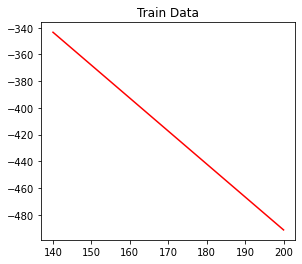

In [29]:
# 성별 예측 결정 경계 그리기
plt.figure(figsize=(10,4))

xs = np.linspace(140,200,2)
ys = -(a1/a2)*xs - b/a2

plt.subplot(1,2,1)  
plt.title('Train Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_train, c=y_train, s=0.05)
plt.ylim([30,130])
plt.xlim([130,210])

plt.subplot(1,2,2)  
plt.title('Test Data')
plt.plot(xs,ys, c='r')
plt.scatter(X_train, c=y_test, s=0.05)
plt.ylim([30,130])
plt.xlim([130,210])

**PCA**

In [35]:
# import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA 
from sklearn.model_selection import KFold

In [31]:
# 표준 스케일링
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

In [38]:
rfc = RandomForestClassifier(n_estimators=100)
cv = KFold(5)
cross_val_score(rfc, X, y, cv=cv).mean().round(4)

0.5406

In [42]:
pca = PCA(n_components=80)
X_pca6 = pca.fit_transform(X)
X_pca6.shape

(1010, 80)

In [43]:
cross_val_score(rfc, X_pca6, y, cv=cv).mean().round(4)

0.6386

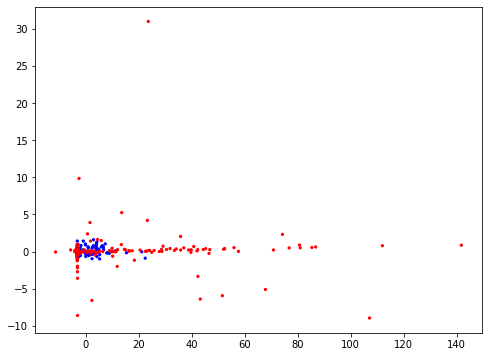

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca6[:,0],X_pca6[:,1], c=y, s=5, cmap='bwr', marker = 'o')

#for n in range(total.shape[0]):
#    plt.text(X_pca6[:,0][n]*1.03, X_pca6[:,1][n]*0.98, total.index[n])

In [ ]:
rfc = RandomForestClassifier(n_estimators=80)
cv = KFold(5)
cross_val_score(rfc, X, y, cv=cv).mean().round(4)

0.5505

**클러스터링**

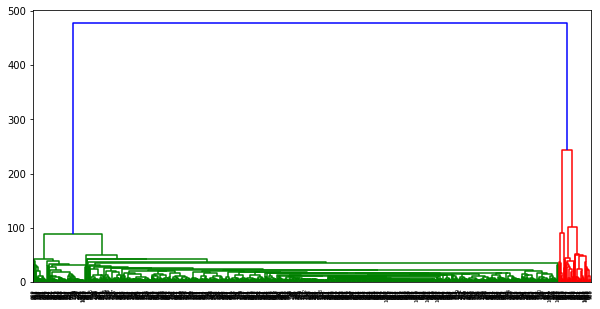

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
link_dist = linkage(total, metric='euclidean', method='ward')  
_= dendrogram(link_dist, labels=total.index.tolist())
# plt.show()

**밀도기반**

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) # (1) 모델 생성, 정의, 생성자
kmeans.fit(X) # (2) 학습

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
centers = kmeans.cluster_centers_ ; centers

array([[-0.0130897 , -0.01273262, -0.01293632, ..., -0.00966252,
        -0.00931788, -0.00899755],
       [-0.74668826, -0.74975626, -0.75217551, ..., -0.64698363,
        -0.65073071, -0.65423612]])

TypeError: ignored

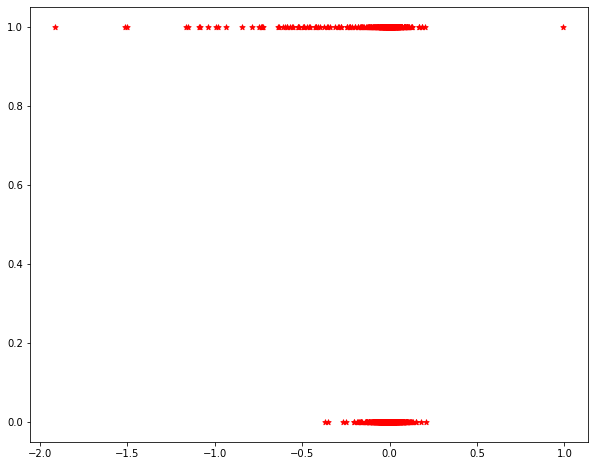

In [50]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
for n in range(total.shape[0]):
    label = kmeans.labels_[n]
    plt.scatter(total[n], total['6500'], c=my_color[label], marker=my_markers[label], s=30)
    plt.text(total[n]*1.03, total['6500'][n]*0.98)
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 100)

**MLP**

In [51]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GRU
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, GlobalAveragePooling1D
from keras.utils import np_utils

In [55]:
N=10

In [56]:
model_m = Sequential()
model_m.add(Reshape((N*3,),input_shape=(N,3)))
model_m.add(Dense(100, activation='relu',input_shape=(N*3,)))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(100, activation='relu'))
model_m.add(Dense(6, activation='softmax'))
# model_m.summary()

In [ ]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

h = model_m.fit(X_train,
                      y_train,
                      batch_size=10,
                      epochs=30,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=0)

In [60]:
def show_results(y_test, y_pred):
    max_y_pred_test = np.argmax(y_pred, axis=1)
    max_y_test = np.argmax(y_test, axis=1)
    show_confusion_matrix(max_y_test, max_y_pred_test)
    print(classification_report(max_y_test, max_y_pred_test))
    
y_pred = model_m.predict(X_test)
show_results(y_test, y_pred)

ValueError: ignored

**CNN**

In [62]:
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, GlobalAveragePooling1D

model_m = Sequential()
model_m.add(Conv1D(32, 2, activation='relu',input_shape=(N,3)))
model_m.add(Conv1D(64, 4, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(128, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
# model_m.add(MaxPooling1D(3))
# model_m.add(Flatten())
model_m.add(Dropout(0.3))
model_m.add(Dense(6, activation='softmax'))
print(model_m.summary())

ValueError: ignored